# Recruitment task

Tsormpatzoglou Nikos

20/8/2025

## 1. Simulating a radio signal

Let's start simulating our first signal following these steps:

1. Decide how many samples to use for your signal

In [5]:
num_samples = 500 # Let's agree on 500 samples

2. Define the region of the frequency domain for your signal. It must
contain 1420 MHz and have a bandwidth of < 5 MHz.

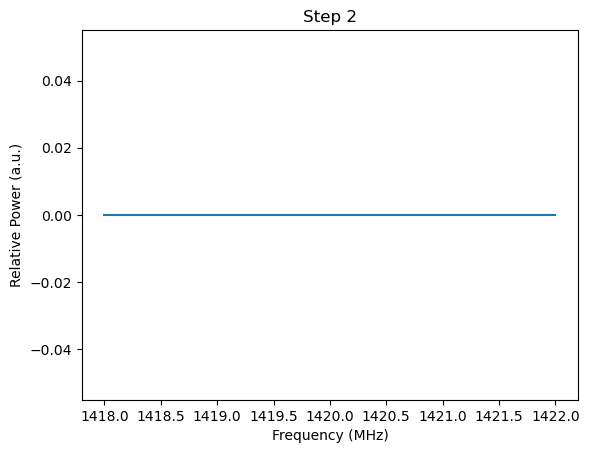

In [6]:
import numpy as np
import matplotlib.pyplot as plt

center_freq = 1420 
bandwidth = 4 # For exaple bandwidth is 4 MHz
freqs = np.linspace(center_freq - bandwidth/2, center_freq + bandwidth/2, num_samples) #frequency domain

# Visualization
plt.plot(freqs, np.zeros_like(freqs))
plt.title("Step 2")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.show()

3. Create a background signal. This signal can have any shape you
want but avoid using a straight line for this task. This background
will be reused on every signal.

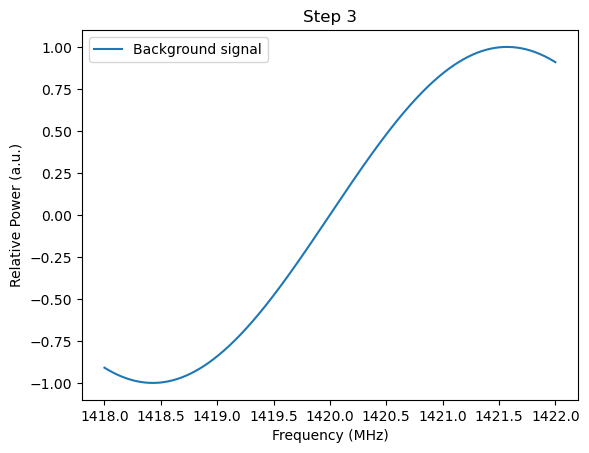

In [7]:
background = np.sin(freqs) #Let's choose the sine function

# Visualization
plt.plot(freqs, background, label="Background signal")
plt.title("Step 3")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.legend()
plt.show()

4. Add gaussian noise to your background. The noise should be random
for each time segment.

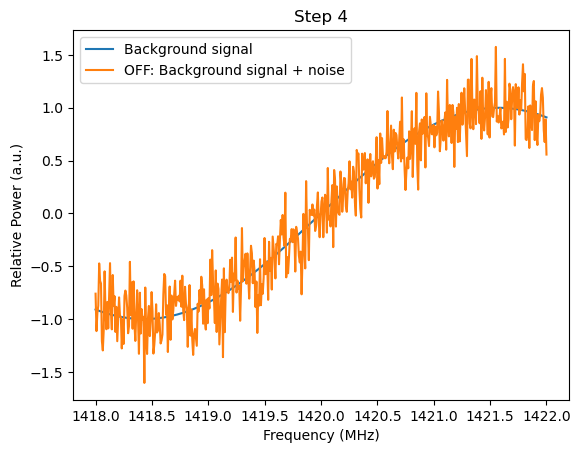

In [11]:
import numpy as np
import matplotlib.pyplot as plt

mean = 0 #μ
st_deviation = 0.2 #σ
np.random.seed(None)
noise = np.random.normal(mean, st_deviation, num_samples)

off_segment = background + noise

# Visualization
plt.plot(freqs, background, label="Background signal")
plt.plot(freqs, off_segment, label="OFF: Background signal + noise")
plt.title("Step 4")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Relative Power (a.u.)")
plt.legend()
plt.show()

5. Repeat for a number of time segments you provide in order to create a
”waterfall”. This duration of time will be constant for every signal.
6. Visualise the waterfall as a heatmap where Relative Power is represented by color.

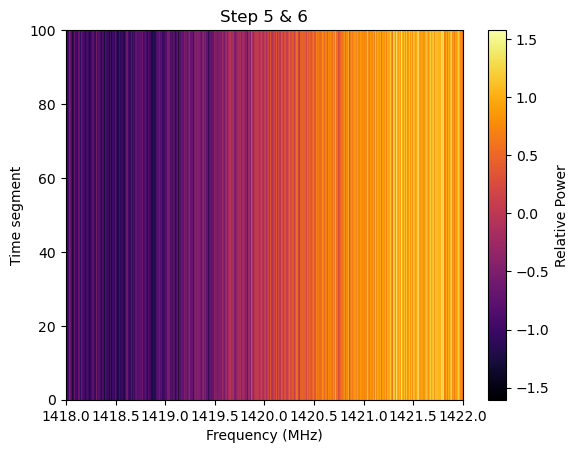

In [14]:
num_segments = 100 # Time segments
waterfall_off = []

for _ in range(num_segments):
    signal_segment = background + noise
    waterfall_off.append(signal_segment)

waterfall_off = np.array(waterfall_off)

# Visualization
plt.imshow(waterfall_off, aspect='auto', origin='lower',
extent=[freqs[0], freqs[-1], 0, num_segments], cmap='inferno')
plt.colorbar(label="Relative Power")
plt.title("Step 5 & 6")
plt.xlabel("Frequency (MHz)")
plt.ylabel("Time segment")
plt.show()